<a href="https://colab.research.google.com/github/Pantodynamos/MyProjects/blob/main/FINALPROJAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv("heartpredict.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


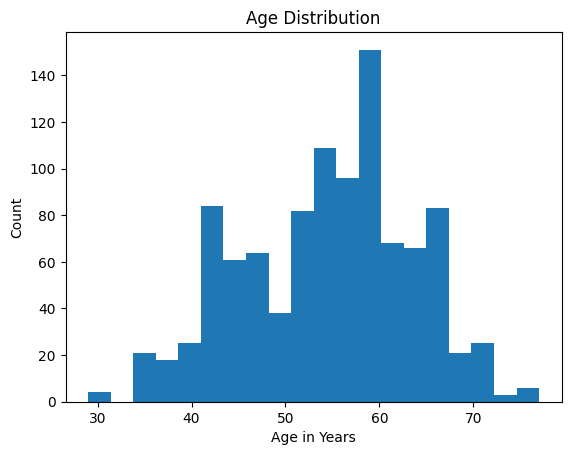

In [ ]:
plt.hist(df.age, bins=20)
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age in Years")
plt.show()

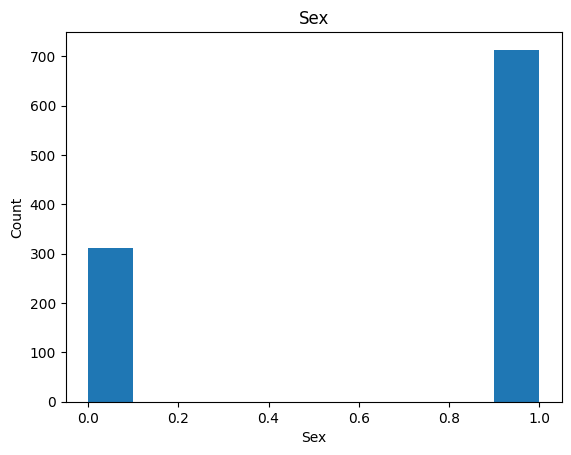

In [ ]:
plt.hist(df.sex, bins=10)
plt.title("Sex")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

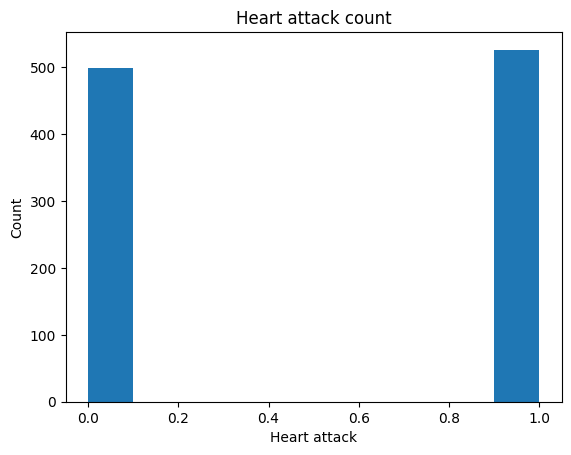

In [ ]:
plt.hist(df.target, bins=10)
plt.title("Heart attack count")
plt.ylabel("Count")
plt.xlabel("Heart attack")
plt.show()

In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.4),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.4),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.evaluate(x_train, y_train)

20/20 [==============================] - 1s 3ms/step - loss: 0.6864 - accuracy: 0.5024


[0.6863964796066284, 0.5023771524429321]

In [ ]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4286


[0.711190938949585, 0.4285714328289032]

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid))

Epoch 1/100
20/20 [==============================] - 1s 7ms/step - loss: 0.6774 - accuracy: 0.5769 - val_loss: 0.5134 - val_accuracy: 0.8143
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5513 - accuracy: 0.7068 - val_loss: 0.4254 - val_accuracy: 0.8524
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.7908 - val_loss: 0.3677 - val_accuracy: 0.8667
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.7940 - val_loss: 0.3378 - val_accuracy: 0.8810
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.8003 - val_loss: 0.3162 - val_accuracy: 0.8857
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8257 - val_loss: 0.3007 - val_accuracy: 0.8810
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3961 - accuracy: 0.8082 - val_loss: 0.2936 - val_accuracy: 0.8952
Epoch 8/100
2

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

7/7 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9668
Test Accuracy: 0.97


In [ ]:
age = int(input('Enter age: '))
sex = int(input('Enter sex (1 = male; 0 = female): '))
cp = int(input('Enter chest pain type (4 values): '))
trestbps = int(input('Enter resting blood pressure: '))
chol = int(input('Enter serum cholestrol in mg/dl: '))
fbs = int(input('Enter (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false): '))
resteceg = int(input('Enter resting electrocardiographic results (values 0,1,2): '))
thalach = int(input('Enter maximum heart rate achieved: '))
exang = int(input('Enter exercise induced angina(1 for yes, 0 for no): '))
oldpeak = float(input('Enter ST depression induced by exercise relative to rest: '))
slope = int(input('Enter the slope of the peak exercise ST segment: '))
ca = int(input('Enter number of major vessels (0-3) colored by flourosopy: '))
thal = int(input('Enter thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: '))

Enter age: 50
Enter sex (1 = male; 0 = female): 1
Enter chest pain type (4 values): 2
Enter resting blood pressure: 130
Enter serum cholestrol in mg/dl: 200
Enter (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false): 0
Enter resting electrocardiographic results (values 0,1,2): 1
Enter maximum heart rate achieved: 160
Enter exercise induced angina(1 for yes, 0 for no): 0
Enter ST depression induced by exercise relative to rest: 2
Enter the slope of the peak exercise ST segment: 1
Enter number of major vessels (0-3) colored by flourosopy: 1
Enter thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: 2


In [ ]:
input_data = pd.DataFrame({
    'age': [age],
    'sex' : [sex],
    'cp': [cp],
    'trestbps': [trestbps],
    'chol': [chol],
    'fbs' : [fbs],
    'resteceg' : [resteceg],
    'thalach' : [thalach],
    'exang' : [exang],
    'oldpeak' : [oldpeak],
    'slope' : [slope],
    'ca' : [ca],
    'thal' : [thal]
})


In [ ]:
input_data = scaler.transform(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
prediction = model.predict(input_data)
if prediction[0] >= 0.5:
    print('Heart attack predicted.')
else:
    print('No heart attack predicted.')

1/1 [==============================] - 0s 72ms/step
No heart attack predicted.
